In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
import tensorflow as tf

In [2]:
import os
import cv2


In [3]:
path='./images'
num_str =['one','two','three','four','five','six','seven','eight','nine']
num_int = [1,2,3,4,5,6,7,8,9]
num={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9}
i=0
image_label=[]
image_list=[]
for f_path,d_name,f_name in os.walk(path):
    for i in f_name:
        file = i
        file_lab = file.split('_')[0]
        image_file = cv2.imread(path+'/'+file)
        image_file = image_file/255.0
        #image_file = image_file/255.0
        image_label.append(num[file_lab])
        image_list.append(image_file)
#print(i)
print(image_label)
print(image_list[0])
print(np.shape(image_list))

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.       

In [4]:
X = np.array(image_list)
y = np.array(image_label,dtype='uint8')

In [5]:
y

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [9]:
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_test, y_test))

Train on 154 samples, validate on 18 samples
Epoch 1/100
154/154 [==============================] - 4s 28ms/sample - loss: 2.2758 - accuracy: 0.1494 - val_loss: 2.2817 - val_accuracy: 0.1667
Epoch 2/100
154/154 [==============================] - 1s 7ms/sample - loss: 2.1753 - accuracy: 0.2208 - val_loss: 2.2348 - val_accuracy: 0.0556
Epoch 3/100
154/154 [==============================] - 1s 7ms/sample - loss: 2.0422 - accuracy: 0.2987 - val_loss: 2.0928 - val_accuracy: 0.2778
Epoch 4/100
154/154 [==============================] - 1s 4ms/sample - loss: 1.8620 - accuracy: 0.5909 - val_loss: 1.8922 - val_accuracy: 0.4444
Epoch 5/100
154/154 [==============================] - 1s 5ms/sample - loss: 1.5681 - accuracy: 0.7403 - val_loss: 1.7322 - val_accuracy: 0.5000
Epoch 6/100
154/154 [==============================] - 1s 6ms/sample - loss: 1.2219 - accuracy: 0.7468 - val_loss: 1.3779 - val_accuracy: 0.6667
Epoch 7/100
154/154 [==============================] - 1s 6ms/sample - loss: 0.8586 

154/154 [==============================] - 1s 5ms/sample - loss: 5.2444e-04 - accuracy: 1.0000 - val_loss: 0.5701 - val_accuracy: 0.8889
Epoch 57/100
154/154 [==============================] - 1s 5ms/sample - loss: 4.8598e-04 - accuracy: 1.0000 - val_loss: 0.5516 - val_accuracy: 0.8889
Epoch 58/100
154/154 [==============================] - 1s 5ms/sample - loss: 4.6326e-04 - accuracy: 1.0000 - val_loss: 0.5695 - val_accuracy: 0.8889
Epoch 59/100
154/154 [==============================] - 1s 4ms/sample - loss: 4.2103e-04 - accuracy: 1.0000 - val_loss: 0.5807 - val_accuracy: 0.8889
Epoch 60/100
154/154 [==============================] - 1s 5ms/sample - loss: 4.0593e-04 - accuracy: 1.0000 - val_loss: 0.5721 - val_accuracy: 0.8889
Epoch 61/100
154/154 [==============================] - 1s 5ms/sample - loss: 3.7787e-04 - accuracy: 1.0000 - val_loss: 0.5702 - val_accuracy: 0.8889
Epoch 62/100
154/154 [==============================] - 1s 5ms/sample - loss: 3.5484e-04 - accuracy: 1.0000 - val

18/1 - 0s - loss: 0.6231 - accuracy: 0.8333
0.8333333


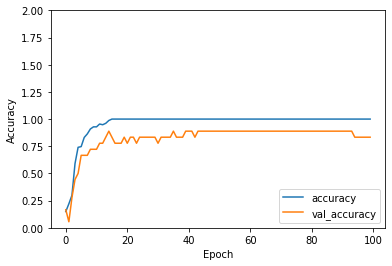

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy' )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(test_acc)


1
5
4
9
1
9
4
1
4
5
8
7
1
2
2
8
7
1
1
2
7
4
4
9
7
4
4
4
2
5
8
9
6
6
3
8
7
1
5
6


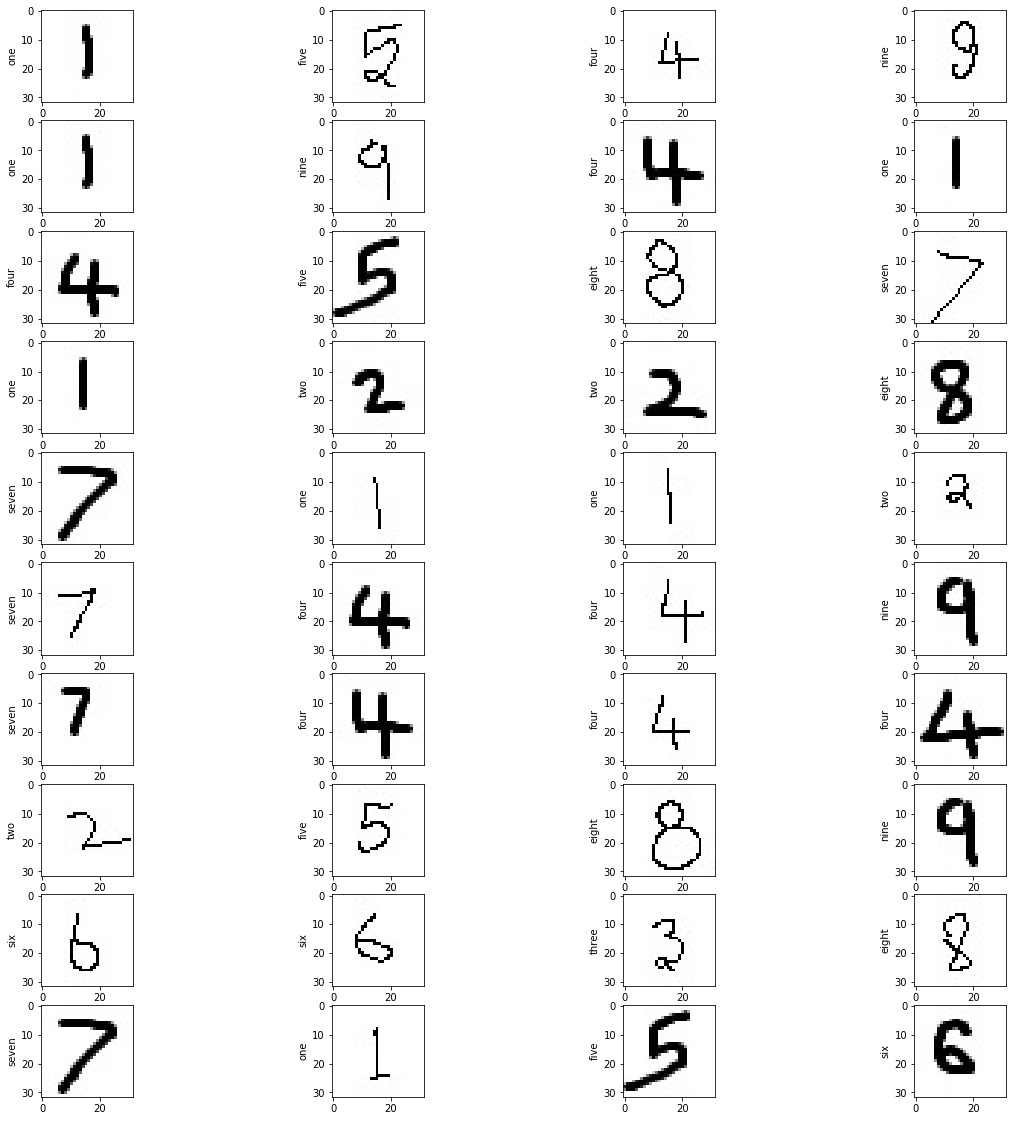

In [21]:
plt.figure(figsize=(20,20))
for i in range(40):
    
    
    img=X_train[i]
    img1 = img.reshape((1,32,32,3),order='C')

    name=model.predict_classes(img1)
    print(name[0])
    name_1=num_str[name[0]-1]
    plt.subplot(10,4,i+1,label=name_1)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.ylabel(name_1)
plt.show()

In [22]:
from tensorflow.keras.models import load_model

In [23]:
model.save('numbers_det.h5')



In [24]:
later = load_model('numbers_det.h5')

In [25]:
later.predict_classes(img1)

array([6], dtype=int64)

1
5
4
9
1
9
4
1
4
5
8
7
1
2
2
8
7
1
1
2
7
4
4
9
7
4
4
4
2
5
8
9
6
6
3
8
7
1
5
6


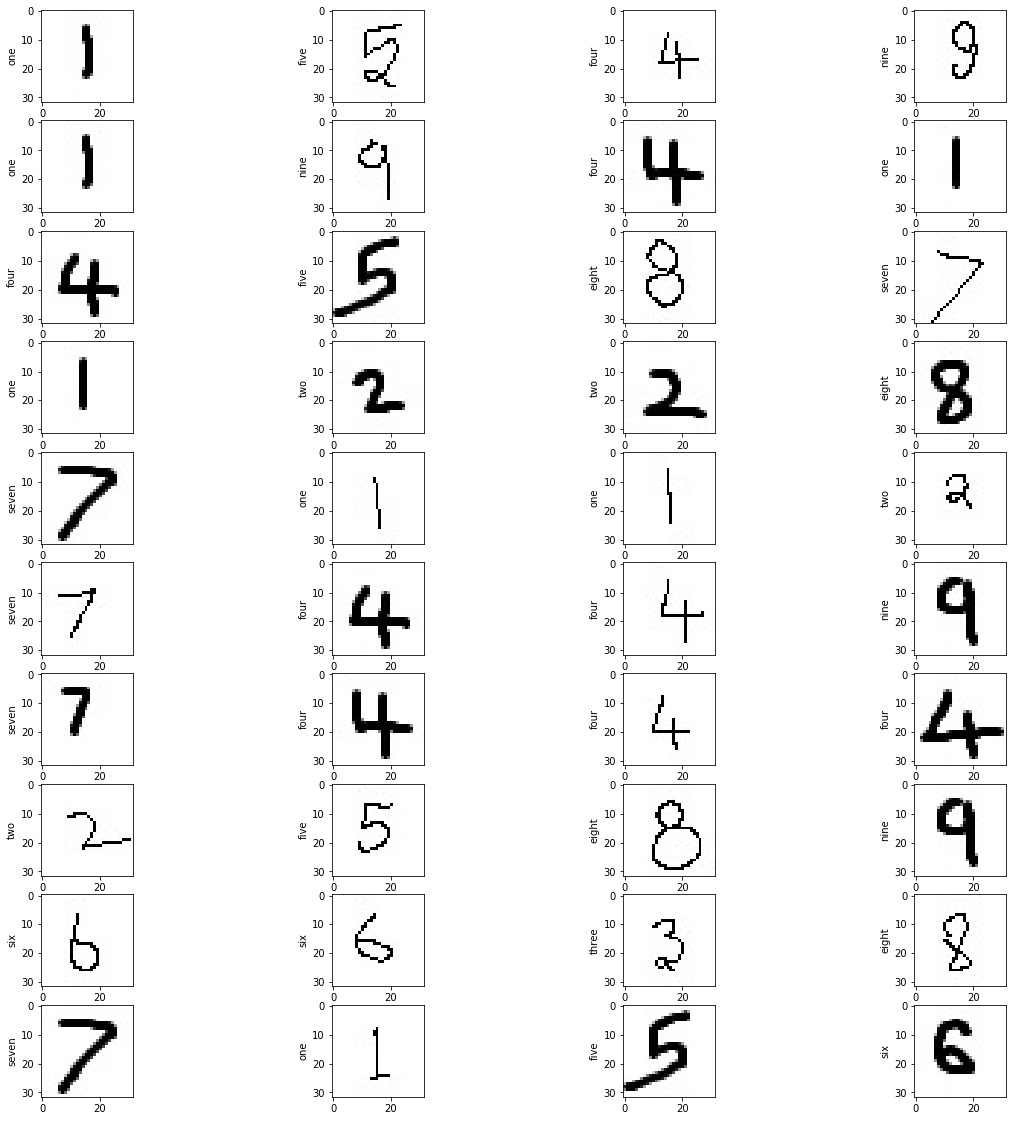

In [26]:
plt.figure(figsize=(20,20))
for i in range(40):
    
    
    img=X_train[i]
    img1 = img.reshape((1,32,32,3),order='C')

    name=later.predict_classes(img1)
    print(name[0])
    name_1=num_str[name[0]-1]
    plt.subplot(10,4,i+1,label=name_1)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.ylabel(name_1)
plt.show()

In [27]:
img = cv2.imread('test.jpg',1)
img=img/255.0
img1=np.reshape(img,(1,32,32,3))

name=later.predict_classes(img1)
print(name[0])

9
